[[ 7.69785011  7.86893073  8.79478619  8.58659223  9.25382843  9.4590023
   9.65123272 10.10071898  9.45309376  9.23644467  9.35356801 10.18286106
  10.23928027 10.07096101  9.61914178 10.30202661 10.22025188 10.4038943
  10.38715623 10.09198745]
 [ 5.35607623  7.          7.89115856  7.93999752  8.09199935  9.30024432
   9.13820414 10.0805683   9.87221082  9.88749413  9.92403339  9.71933668
  10.14112737  9.86202764  9.87658644 10.1785065  10.05657722 10.31674576
  10.17498057 10.24245471]
 [ 3.          7.15435045  4.          5.71148054  9.21894347  9.76229983
  10.01434045  9.82530547 10.00316918  9.81374414  9.88146648  9.36480581
   9.73557433 10.13982669 10.19888816  9.93157924 10.32145888 10.35057925
   9.70983294 10.2215825 ]
 [ 7.67414522  8.88028223  8.07562564  8.62043335  9.78062225  9.71430912
  10.00139236 10.28153496 10.22163503 10.09437109 10.27478096  9.90329945
   9.23034464  9.63871759  9.27484507 10.24508253 10.27958312 10.31183714
  10.25980262 10.45096284]
 [10.2

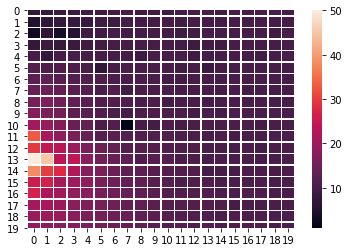

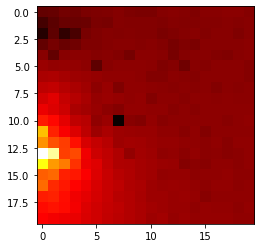

In [82]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import seaborn as sns

def SequentialGaussianSimulation(dados,blocos,p):
    resultado = np.zeros(blocos)
    dados = np.array(dados) # Sao os dados inciais da matriz
    w = blocos[0] * blocos[1] # w eh o numero de elementos da matriz
    v = [] # Vetor no qual sera sorteada a ordem de preenchimento da matriz
    m = blocos[0] # m eh o numero de linhas
    n = blocos[1] # n eh o numero de colunas

    # V sera preenchido e permutado
    for i in range (w):
      v.append(i)
    rd.shuffle(v)

    # interpolacao de Sherpard
    for i in range (w):
      x = int(v[i]/m)
      if v[i] == 0:
        y = 0 
      else:
        y = int(v[i]%n)

      dist = np.sqrt((x-dados[:, 0])**2+(y-dados[:, 1])**2)

      if 0 in dist:
        ind = np.where(dist == 0)
        resultado[x,y] = dados[ind[0][0],2]
      else:
        resultado[x,y] = np.sum((1/dist**p)*dados[:,2])/np.sum(1/dist**p)

      dados = np.append(dados,[[x,y,resultado[x,y]]],axis = 0)

    return resultado

dados = [[1,1,7],[2,0,3],[2,2,4],[14,13,10],[13,0,50],[10,7,1]]
blocos = (20,20)
x = SequentialGaussianSimulation(dados,blocos,2)

print(x)

ax = sns.heatmap(x, linewidth=0.5)
plt.show()
plt.imshow(x, cmap='hot', interpolation='nearest')
plt.show()